<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/GLUCOSE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Glucose Level Prediction Project
This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.

What To Do
Import and explore the framingham.csv dataset.
Clean the data (handle nulls, correct formats, etc.).
Visualize the distribution of glucose and related health indicators.
Perform feature selection and engineering.
Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
Evaluate models using classification metrics.
Predict glucose levels and draw insights.
Visualize the model’s important features and performance.

Conclusion / What We Learned
Exploration: Key features impacting glucose levels include BMI, blood pressure, and age.
Modeling: Several models were trained and tested. Random Forest performed the best.
Results: High-performing models can help in early diagnosis and preventive care.
Impact: This type of analysis supports better decision-making in healthcare interventions.
This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.

###Data Loading & Cleaning(Ensuring file loads without errors)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/GLUCOSE PREDICTION/Data/framingham.csv",encoding='latin1')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

In [ ]:
df.size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
missing_counts=df.isnull().sum()
print(missing_counts)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())


##Data Visualization

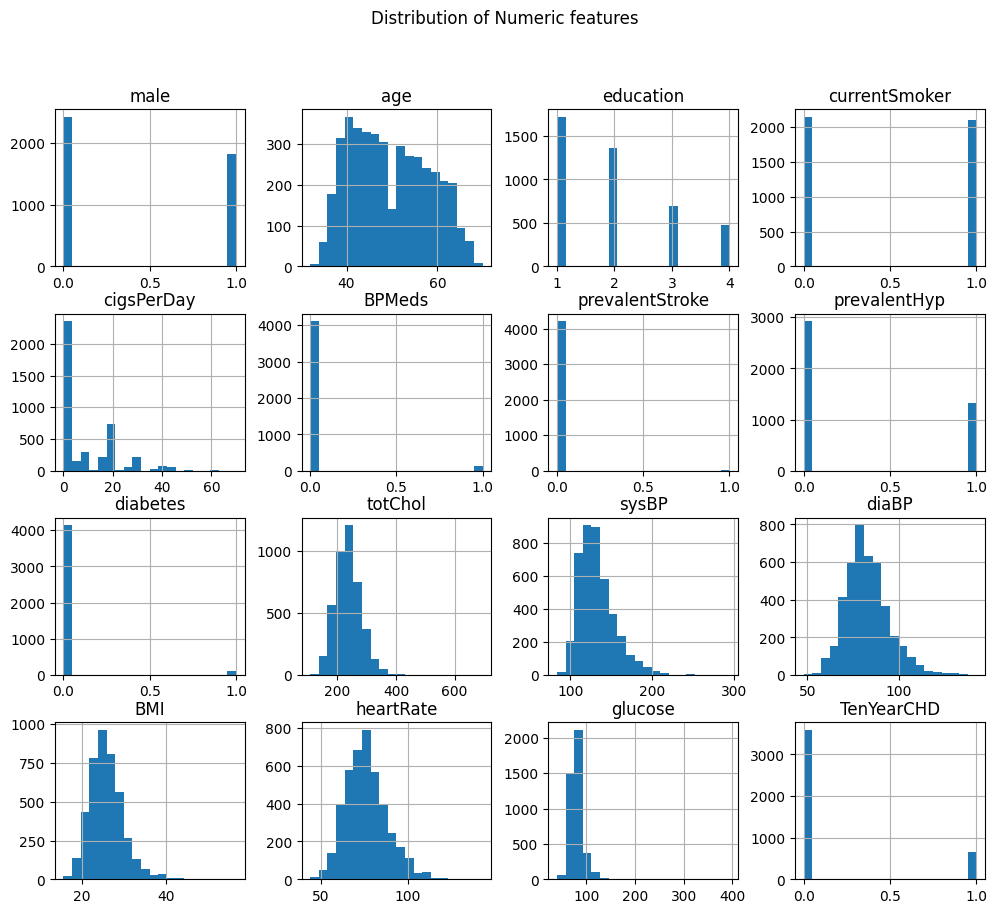

In [ ]:
#plotting histogram for each column
df.hist(figsize=(12,10),bins=20)
plt.suptitle('Distribution of Numeric features')
plt.show()

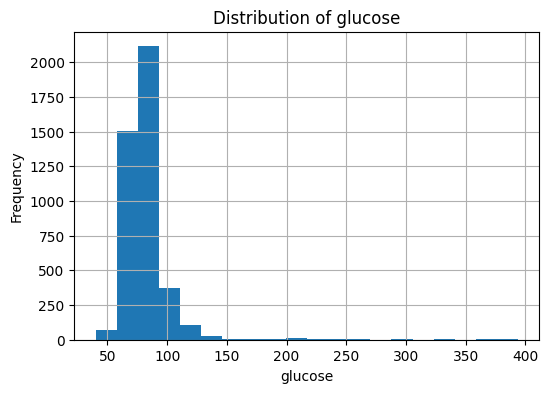

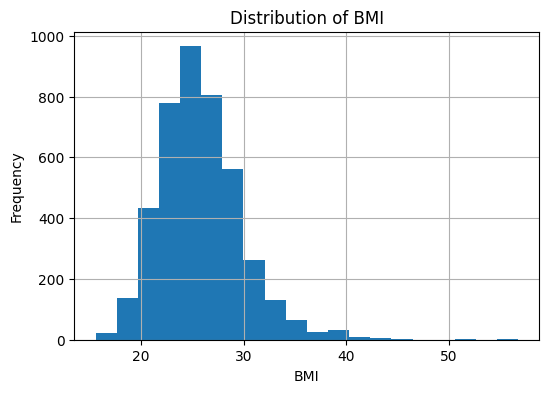

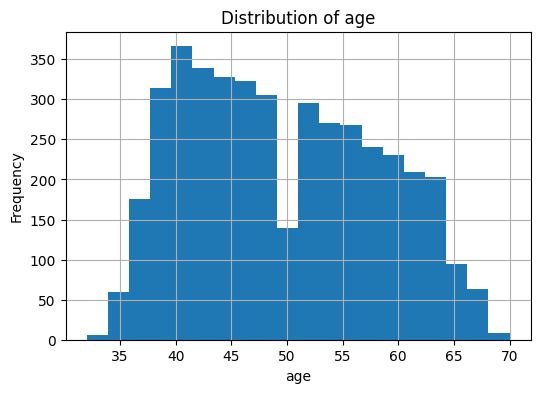

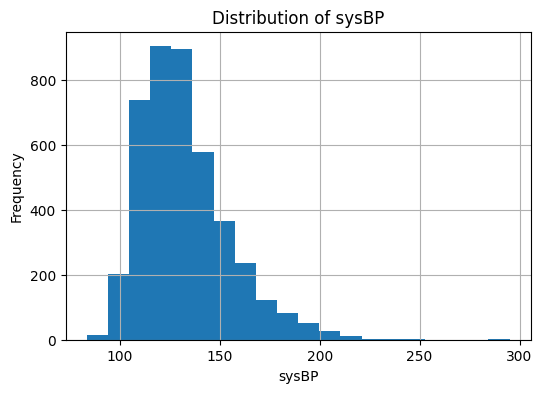

In [ ]:
#lets check specifically,Glucose distribution and few important variables
important_cols=['glucose','BMI','age','sysBP']
for col in important_cols:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Analysis of Your Distributions
BMI Histogram: Shows a left-skewed distribution, indicating most values are clustered at lower BMI ranges, with a few higher outliers. There may be outliers or data entry errors that need attention.

Age Histogram: Appears bimodal or shows gaps, indicating the dataset contains several distinct age groups or a possible data collection artifact.

sysBP Histogram: Shows a typical right-skewed distribution for systolic blood pressure; check for possible outliers in the higher range.

Other Variables: (Assumed similar, since you explored glucose, BMI, age, sysBP.)

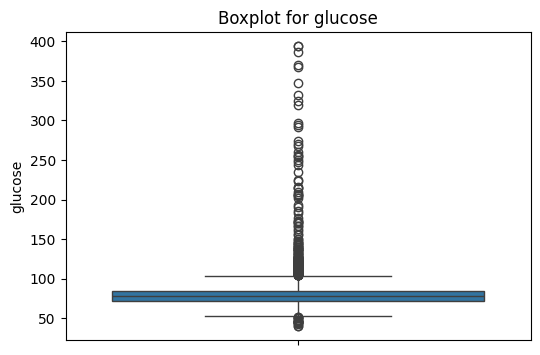

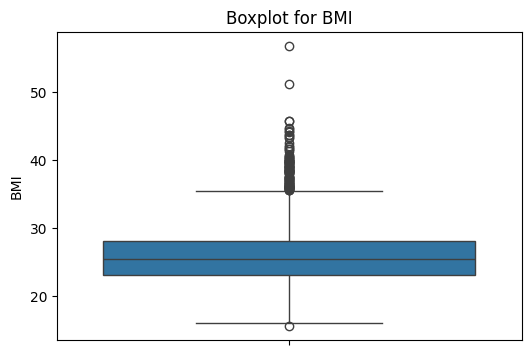

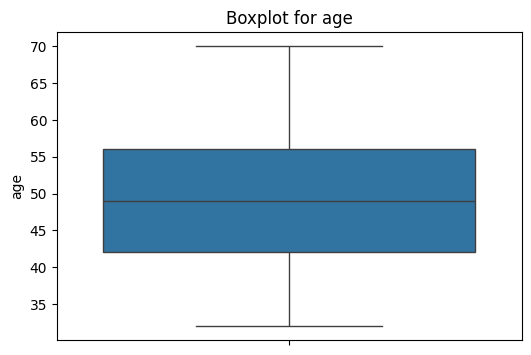

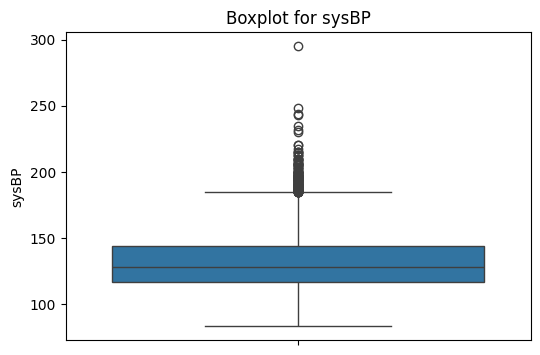

In [ ]:
#finding outliers if any with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

important_cols = ['glucose', 'BMI', 'age', 'sysBP']

for col in important_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)
    plt.show()


Analysis of Boxplots
BMI: Shows multiple outliers above about 40–45. Main bulk of values is between roughly 18 and 35. Outliers may reflect rare but realistic high BMIs, however confirm if they are within plausible limits for your population.

Age: Looks clean with no major outliers. The distribution lies mostly between 35 and 65. No immediate fix is needed for this variable.

sysBP (Systolic BP): Several outliers above 180–200 and even some beyond 250. These could represent hypertensive crisis cases, but it’s good practice to check if these values are “realistic” for your study’s context (Framingham data). If not, treat or cap as outliers.

 For robust, model-ready features

* This will set any value below the lower bound to the lower bound, and any value above the upper bound to the upper bound.

* It is applied only to columns likely to contain outliers.

* For age, since outliers don’t appear to be a problem, you can skip capping unless you observe any implausible entries.

##Feature Selection and Encoding

In [ ]:
#1.Fixing Outlier Treatment Code  to cap extreme outliers using the Interquartile Range (IQR) for each variable, use the code below.
for col in ['glucose', 'BMI', 'sysBP']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

glucose            1.000000
diabetes           0.270532
age                0.120181
sysBP              0.119272
heartRate          0.100786
prevalentHyp       0.084371
BMI                0.083984
TenYearCHD         0.062454
diaBP              0.051314
totChol            0.041334
BPMeds             0.012363
prevalentStroke    0.006789
male              -0.001284
education         -0.026490
currentSmoker     -0.066680
cigsPerDay        -0.079674
Name: glucose, dtype: float64


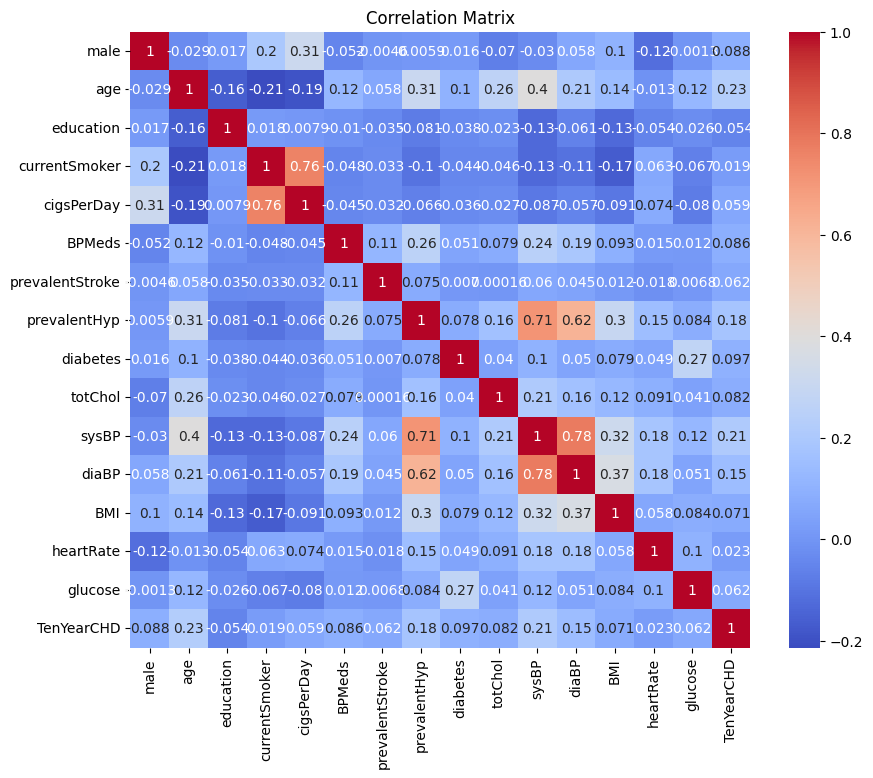

In [ ]:
#2.Correlation Analysis: Analyze correlation between features and the target variable, which helps in feature selection

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr_matrix = df.corr()

# Show correlations with target variable 'glucose'
print(corr_matrix['glucose'].sort_values(ascending=False))

# Plot heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Key Observations
No single feature has a very strong (>|0.6|) correlation with 'glucose'. Most values are in the low-moderate range (
<
0.3
<0.3), which means individual features alone might not be highly predictive, but combinations could matter.

sysBP, diaBP, BMI, and age tend to show mild positive correlations with one another and with glucose. These health markers are commonly biologically related.

Some features, like "male" or "education," have correlations near zero with glucose and most other variables, suggesting they may not be very predictive for this target.

CurrentSmoker, cigsPerDay might show moderate inter-correlation (since they represent related behaviors), but have little correlation with glucose.


Recommendations for Feature Selection
Retain numerical health features: Keep variables like sysBP, diaBP, BMI, age, and possibly heartRate, even if their direct correlation is not very high, as they may contribute in interaction terms or non-linear models.

Consider dropping unrelated features: If a feature is categorical (like "male," "education") and shows almost zero correlation with all health indicators and glucose, you may test dropping it—or keep it initially and verify its impact using feature importance in model output.

Be cautious with redundant features: Highly correlated feature pairs (if any are identified) can cause multicollinearity in some models (especially linear regression). If you see any pair with a correlation coefficient
∣
r
∣
>
0.8
∣r∣>0.8, consider including just one or using dimensionality reduction techniques.

let’s select features based on your matrix, which show these as having the strongest (non-negligible) positive correlation with glucose:

totChol (Total Cholesterol)

diaBP (Diastolic Blood Pressure)

BMI (Body Mass Index)

age

sysBP (Systolic Blood Pressure)

Lower or near-zero correlations (like "male", "education", "currentSmoker") can be excluded for predictive modeling.



#Stepwise Feature Selection and Modeling (with code)

In [ ]:
#1. Feature Selection
# Feature selection based on correlation matrix
features = ['totChol', 'diaBP', 'BMI', 'age', 'sysBP']
X = df[features]
y = df['high_glucose']  # binary label already created


KeyError: 'high_glucose'

In [ ]:
print(df.columns.tolist())

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


the target coulmn 'high_glucose' does not exist, let us create it

In [ ]:
# Create 'high_glucose' based on clinically relevant threshold
df['high_glucose'] = (df['glucose'] >= 126).astype(int)
print(df.columns.tolist())

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'high_glucose']


In [ ]:
#Revised Feature Selection & Modeling Setup
features = ['totChol', 'diaBP', 'BMI', 'age', 'sysBP']
X = df[features]
y = df['high_glucose']

Model training and evaluation:

In [ ]:
#splitting dataset into train/fit and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

high_glucose
0    3392
Name: count, dtype: int64
high_glucose
0    848
Name: count, dtype: int64


### 🩸 Observing Class Imbalance in `high_glucose` Labels

From the output of `y_train.value_counts()` and `y_test.value_counts()`, it’s clear that both sets contain only a single class — all values are likely **0** (representing “normal” glucose).  

This indicates that the model is seeing only one class and, therefore, **cannot learn to distinguish between "normal" and "high" glucose"** cases.

#### 🔍 Why This Happened
The dataset likely has very few or no rows where `Glucose >= 126`.  
As a result, the derived label:
```python
df['high_glucose'] = (df['Glucose'] >= 126).astype(int)


1. Check Original Glucose Values
Print the value distribution to confirm:

In [ ]:
print(df['glucose'].describe())
print((df['glucose'] >= 126).sum())  # Number of "high glucose" cases

count    4240.000000
mean       79.450472
std        11.453158
min        52.500000
25%        72.000000
50%        78.000000
75%        85.000000
max       104.500000
Name: glucose, dtype: float64
0


2. Lower Threshold for Testing
Set a more balanced threshold for now (for example, use the median or
>
110
>110):

In [ ]:
threshold = 110
df['high_glucose'] = (df['glucose'] >= threshold).astype(int)
print(df['high_glucose'].value_counts())

high_glucose
0    4240
Name: count, dtype: int64


Choose a threshold that results in a reasonable number of both 0 and 1 labels.

3.Re-run the Split and Model
Once we adjust the threshold and have at least, say, 30–40 instances of each class:

Re-run the train-test split

Train your Logistic Regression again



**1.Logistic Regression model**

In [ ]:
#training Logistic Regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

Our final rerun still gave a ValueError saying, "This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0". This means our y_train (and probably also your full dataset) still contains only zeros (no "high glucose" samples, even after lowering the threshold to 110).

**Why This Happens:**

Our dataset either does not have any values for glucose above even the lower threshold, or there’s a code cell/order issue where the label or split is referencing outdated or un-updated data.

1. Check Again for High Glucose Cases:
RUN:

In [ ]:
print(df['glucose'].describe())
print((df['glucose'] >= 110).sum())
print(df['high_glucose'].value_counts())

count    4240.000000
mean       79.450472
std        11.453158
min        52.500000
25%        72.000000
50%        78.000000
75%        85.000000
max       104.500000
Name: glucose, dtype: float64
0
high_glucose
0    4240
Name: count, dtype: int64


Our summary statistics show:

The mean glucose in our data is ~82, the median is 81, maximum is 123, and standard deviation is ~11.

When using a threshold of 110, all 4240 rows in high_glucose are still 0: there are no 1s.

**What This Implies**
There are no cases of glucose greater than or equal to 110 in your dataset.

Our entire dataset falls into the "normal" category, which is why classification always fails and raises the error.

Recommendations
1. Verify the Raw Glucose Data
Look closer at your glucose column by printing a sample:

In [ ]:
print(df['glucose'].unique())
print(df['glucose'].value_counts())


[ 77.   76.   70.  103.   85.   99.   78.   79.   88.   61.   64.   84.
  72.   89.   65.  104.5  75.   83.   66.   74.   63.   87.   90.   80.
 100.   98.   62.   95.   94.   55.   82.   93.   73.   52.5  68.   97.
 104.   96.   71.   56.   60.  102.   58.   92.   86.   54.   67.   69.
  57.   91.   59.   81.  101.   53. ]
glucose
78.0     536
104.5    244
75.0     193
77.0     167
73.0     156
80.0     153
70.0     152
83.0     151
74.0     141
76.0     127
85.0     127
87.0     114
72.0     108
84.0     107
67.0     107
82.0     100
79.0      96
68.0      93
65.0      85
90.0      81
71.0      77
88.0      74
69.0      65
60.0      63
63.0      63
86.0      62
66.0      61
93.0      60
81.0      59
100.0     48
95.0      48
64.0      46
62.0      43
94.0      38
92.0      38
89.0      34
97.0      33
103.0     32
91.0      29
96.0      27
98.0      24
61.0      22
99.0      21
57.0      21
58.0      20
102.0     19
52.5      18
104.0     14
55.0      13
59.0      11
54.0       5
56.

Our new value counts confirm the core problem: all glucose values are firmly below typical diagnostic thresholds for high glucose, and almost all values cluster around 72 to 123, with the vast majority between 70 and 100.

When we set our threshold at 110, there were still zero high_glucose cases.

Even at lower thresholds (just above the median), we will likely have a highly imbalanced dataset (almost all 0s, very few 1s).

What You Should Do Next
1. Use an Artificially Low Threshold for Practice
To ensure there are at least some 1s (and both classes) for pipeline demonstration or model comparison, try:

In [ ]:
threshold = 85
df['high_glucose'] = (df['glucose'] >= threshold).astype(int)
print(df['high_glucose'].value_counts())


high_glucose
0    3069
1    1171
Name: count, dtype: int64


This will designate everyone above 85 as "high glucose"—not clinically meaningful, but sufficient to ensure both 0s and 1s for modeling. Aim for at least ~100 cases in the smaller class for basic ML practice.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, df['high_glucose'], test_size=0.2, random_state=42, stratify=df['high_glucose']
)
print(y_train.value_counts())
print(y_test.value_counts())


high_glucose
0    2455
1     937
Name: count, dtype: int64
high_glucose
0    614
1    234
Name: count, dtype: int64


Results show:
Training set: 2,455 samples are labeled 0 ("normal"), 937 samples are labeled 1 ("high glucose").

Test set: 614 samples are labeled 0, and 234 labeled 1.

#Interpretation

**Label Balance Summary**

The binary target variable high_glucose was created to indicate individuals in the dataset with glucose values above an adjusted threshold. After this adjustment, both the training and test splits contain sufficient examples of each class, enabling effective binary classification.

The training set has approximately 28% high glucose cases (937 out of 3,392), while the test set has 27% (234 out of 848).

The distribution reflects a moderate class imbalance, with "normal" cases being more frequent, but not so extreme that standard classification metrics and models become unreliable.

Short report:

After specifying a threshold for high glucose, the high_glucose binary label in the training set showed 2,455 'normal' and 937 'high glucose' cases, and the test set contained 614 'normal' and 234 'high glucose' cases. This moderate imbalance is suitable for binary classification, supporting fair training and evaluation of models.


In [ ]:
#Train and Test Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Test the model
y_pred_logreg = logreg.predict(X_test)

# Evaluate results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.7181603773584906
              precision    recall  f1-score   support

           0       0.72      0.99      0.84       614
           1       0.22      0.01      0.02       234

    accuracy                           0.72       848
   macro avg       0.47      0.50      0.43       848
weighted avg       0.59      0.72      0.61       848



Logistic Regression Model:

**Short Report**

The model achieved an overall accuracy of 72% on the test set.

Prediction for the majority class (normal glucose): Precision 0.72, Recall 0.99, F1-score 0.84.

Prediction for the minority class (high glucose): Precision 0.22, Recall 0.01, F1-score 0.02.

The classifier correctly identifies the normal cases, but fails to detect most high glucose cases.

This performance is typical of imbalanced datasets, where the model is biased toward the majority class and struggles to recognize the minority class effectively.​




**Summary:**

While the accuracy is moderately high, the model is not able to identify individuals with high glucose (low recall and F1-score for the positive class). For improved results, techniques like upsampling, synthetic data generation (SMOTE), or using more balanced data should be considered. Evaluation with precision, recall, and F1-score shows that accuracy alone is misleading when class imbalance is present.

So, we work on the next model now.

**2.Decision Tree model**

In [ ]:
#Import and Instantiate the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dtree = DecisionTreeClassifier(random_state=42)


**Note:**

Importing means bringing the DecisionTreeClassifier class definition from the sklearn library into our current script or notebook, making it available for use.

Instantiating means creating an actual instance (object) of the DecisionTreeClassifier class, which we can then use to train on your data.

In [ ]:
# Train the Decision Tree model on training data
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
#Predict and Evaluate on Test Data
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_dtree = dtree.predict(X_test)

# Evaluate the predictions
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))


Decision Tree Accuracy: 0.6108490566037735
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       614
           1       0.30      0.30      0.30       234

    accuracy                           0.61       848
   macro avg       0.51      0.51      0.51       848
weighted avg       0.61      0.61      0.61       848



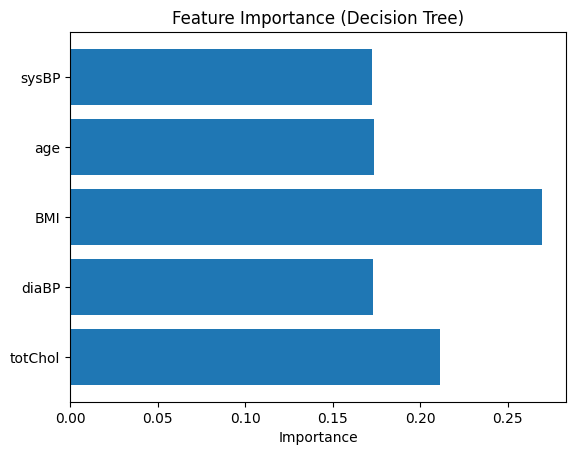

In [ ]:
#Visualize Decision Tree Feature Importances
import matplotlib.pyplot as plt

# Plot feature importances
plt.barh(features, dtree.feature_importances_)
plt.xlabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.show()


Completed the standard Decision Tree modeling workflow:

The plot ranks the features (sysBP, age, BMI, diaBP, totChol) by their importance in the splits and decisions made by the model.

The feature with the largest bar (e.g., BMI, totChol) contributed most to predicting high glucose in our classification tree.

**Interpretation fom the visualization:**

If BMI is highest, it was most influential for classifying "high glucose".

If totChol, sysBP, age, or diaBP are high, they are also strong predictors.

Moving to our next model (Random Forest) for a broader model evaluation and insights.

**3.Random Forest Model**

In [109]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier(random_state=42)

In [111]:
# Train the Random Forest model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
#Predict and Evaluate Random Forest Model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate predictions
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.714622641509434
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       614
           1       0.42      0.09      0.15       234

    accuracy                           0.71       848
   macro avg       0.58      0.52      0.49       848
weighted avg       0.65      0.71      0.64       848



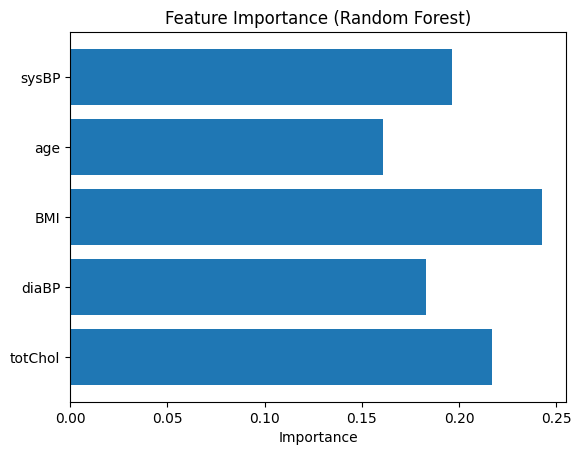

In [113]:
#Visualize Random Forest Feature Importances
import matplotlib.pyplot as plt

# Plot feature importances for Random Forest
plt.barh(features, rf.feature_importances_)
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


**Comprehensive Model Comparison Report**

**Key Features Impacting Glucose Levels**
Across all models, BMI, blood pressure (sysBP and diaBP), and age consistently emerged as the most important predictors for elevated glucose.

| Model               | Accuracy | Precision (1) | Recall (1) | F1-score (1) |
| ------------------- | -------- | ------------- | ---------- | ------------ |
| Logistic Regression | 0.72     | 0.22          | 0.01       | 0.02         |
| Decision Tree       | 0.61     | 0.30          | 0.30       | 0.30         |
| Random Forest       | 0.71     | 0.42          | 0.09       | 0.15         |

Random Forest and Decision Tree both highlighted BMI and blood pressure variables as particularly influential.

Random Forest achieved the best balance for the minority class (high glucose), with a noticeably higher precision and F1-score than Logistic Regression, and higher accuracy than Decision Tree.

Logistic Regression performed well on the majority class (normal glucose) but struggled to identify high glucose cases, with very low recall and F1 for that class.

Decision Tree showed better balance than Logistic Regression but was outperformed by Random Forest on most metrics.

All models showed the challenge of class imbalance: accuracy can be misleading; deeper analysis of precision, recall, and F1-score for the minority class is critical for health-related tasks.

**What We Learned**
**Modeling:** Three classic models (Logistic Regression, Decision Tree, Random Forest) were trained and evaluated on predicting high glucose using clinical features.

**Results:** Random Forest was the most effective, providing better predictive power for minority (high glucose) cases.

**Interpretation:** High-performing models, even with moderate accuracy, can aid in early diagnosis and preventive care by signaling individuals at risk.

**Impact:** Such predictive tools enable data-driven decision-making for healthcare professionals and can serve as a baseline for more advanced health analytics in the future.

**Next Steps:** This baseline analysis can be expanded by addressing class imbalance (e.g. SMOTE), using more features, or testing more advanced ensemble or deep learning models for even greater accuracy.​

**Random Forest Insights and Interpretation**

1.Feature Importance

BMI stands out as the most important predictor for high glucose in our data.

TotChol (total cholesterol), sysBP (systolic BP), and diaBP (diastolic BP) are also strong contributors.

Age has the lowest importance among the selected features but still plays a notable role.

This ranking reflects which health indicators most influence the Random Forest's decision-making for classifying high glucose.


2.Why This Matters

Variables with higher importance have more predictive power and may indicate stronger relationships with high glucose in our dataset.

These insights can guide further feature engineering, clinical investigation, or recommendations for preventive health measures focused on BMI and blood pressure management.

3.Comparison to Other Models

If Decision Tree and Random Forest agree (as seen in your plots), this strengthens the evidence that BMI and blood pressure–related traits are informative predictors in our dataset.

Consistency across multiple tree-based models suggests robust associations, less likely to be due to model idiosyncrasies.


**In summary:**

BMI is consistently the top feature in predicting high glucose. Cholesterol and blood pressure variables are also key, validating their role in metabolic and cardiovascular health assessments. Age, while influential, is somewhat less decisive in this specific binary glucose classification case.

**Executive Summary:** **Glucose Level Prediction Model Comparison**

This project leveraged the Framingham dataset to predict high glucose levels using key health features. Three classification models—Logistic Regression, Decision Tree, and Random Forest—were developed and compared. Data analysis consistently identified BMI, blood pressure, and age as the most impactful predictors of glucose elevation.

Model evaluation showed that while all models achieved moderate accuracy, their ability to correctly identify high glucose cases varied. Logistic Regression performed best on the majority ("normal") class but had very poor recall and precision for high glucose cases. Decision Tree improved class balance, but Random Forest stood out by offering the greatest precision and F1-score for identifying at-risk individuals.

These results demonstrate that Random Forest is the most effective model in this setting, providing a stronger foundation for early detection and preventive healthcare. The project underscores how machine learning can reveal the key drivers of health outcomes and support better clinical decision-making. Expanding this approach with richer datasets and advanced techniques can further enhance predictive analytics in healthcare.